In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [2]:
# Load the data
obesity = pd.read_csv("obesity.csv")

obesity.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [3]:
# Split the data into predictor variables and an outcome variable
X = obesity.drop(["NObeyesdad"], axis=1)
y = obesity.NObeyesdad

In [4]:
# Create a logistic regression model
lr = LogisticRegression()

# Fit the logistic regression model
lr.fit(X, y)

# Print the accuracy of the model
print(lr.score(X, y))

0.7655139744197063


In [5]:
# Create a sequential forward selection model
sfs = SFS(lr, 
          k_features=9, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=0)

# Fit the sequential forward selection model to X and y
sfs.fit(X, y)

# Inspect the results of sequential forward selection
print(sfs.subsets_[9])

{'feature_idx': (0, 1, 2, 3, 6, 9, 10, 14, 17), 'cv_scores': array([0.78351492]), 'avg_score': 0.7835149218379914, 'feature_names': ('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Bike', 'Walking')}


In [6]:
# See which features sequential forward selection chose
print(sfs.subsets_[9]['feature_names'])

('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Bike', 'Walking')


In [7]:
# Print the model accuracy after doing sequential forward selection
print(sfs.subsets_[9]['avg_score'])

0.7835149218379914


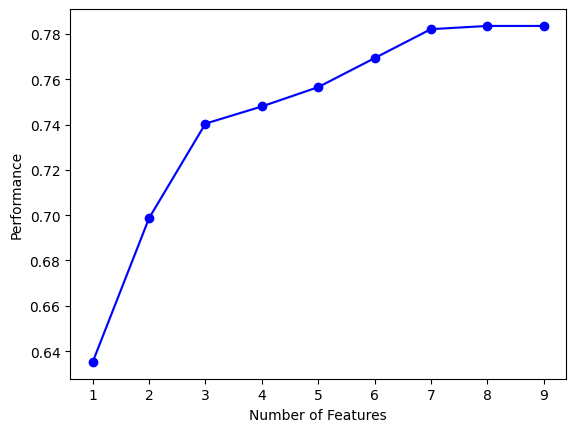

<Figure size 640x480 with 0 Axes>

In [8]:
# Plot the model accuracy as a function of the number of features used
plot_sfs(sfs.get_metric_dict())
plt.show()
plt.clf()

In [9]:
# Create a sequential backward selection model
sbs = SFS(lr, 
          k_features=7, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=0)

# Fit the sequential backward selection model to X and y
sbs.fit(X, y)

# Inspect the results of sequential backward selection
print(sbs.subsets_[7])

{'feature_idx': (0, 1, 2, 3, 6, 10, 17), 'cv_scores': array([0.78304121]), 'avg_score': 0.783041212695405, 'feature_names': ('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'FAF', 'Walking')}


In [10]:
# See which features sequential backward selection chose
print(sbs.subsets_[7]['feature_names'])

('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'FAF', 'Walking')


In [11]:
# Print the model accuracy after doing sequential backward selection
print(sbs.subsets_[7]['avg_score'])

0.783041212695405


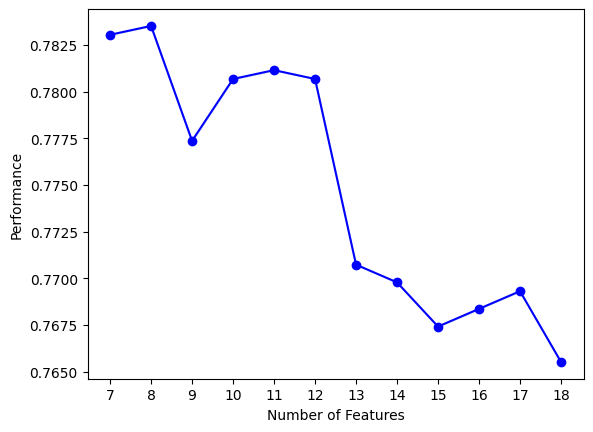

<Figure size 640x480 with 0 Axes>

In [12]:
# Plot the model accuracy as a function of the number of features used
plot_sfs(sbs.get_metric_dict())
plt.show()
plt.clf()